# **Project Details**

The Global Investment Insights project aims to provide a detailed analysis of the S&P 500 and EURO STOXX 50 stock indices, focusing on the last 10 years. The aim is to generate insights that can support investors in their strategies. The analysis includes:

Percentage Yield calculation: Determine the percentage change in closing prices on a monthly and annual basis for each index.

Average Daily Return by Day of the Week: Calculate the average return for each day of the week, to identify any particular trends.

Identification of Extreme Return Days: Determine the days with the highest and lowest daily returns for each index, to analyse volatility.

Calculation of Average Daily Volume: Analysing the average daily trading volume for each index, to understand the level of investor interest.

The datasets used, sp500.csv and euro50.csv, contain price data (open, high, low, close) and trading volume. The analysis is based on the percentage change in closing prices and aggregations of the data by day of the week. This project will help investors plan more informed strategies and better understand historical trends and stock market volatility.

# **Importing Necessary Modules and Dataset**

In [ ]:
"""Mount google drive if necessary and import pandas to work with dataFrame"""

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from matplotlib import pyplot as plt
from typing import Optional

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Useful Functions**

In [ ]:
def verify_path_and_data(filepath: str) -> Optional[pd.DataFrame]:

    """
    Attempts to read a CSV file into a DataFrame. Handles common file-related errors:
    - FileNotFoundError: If the file is not found at the given path.
    - EmptyDataError: If the file is empty.
    - ParserError: If there are parsing errors in the file.
    - General exception: For any other unexpected errors.

    Args:
    filepath (str): The path to the CSV file.

    Returns:
    Optional[pd.DataFrame]: Returns a DataFrame if successful, otherwise None.
    """

    try:
        df = pd.read_csv(filepath)
        return df
    except FileNotFoundError:
        print(f"Error: The file, '{filepath}', was not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file, '{filepath}', is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: The file, '{filepath}', contains parsing errors.")
        return None
    except Exception as e:
        print(f"Unexpected error while reading the file '{filepath}': {e}")
        return None


def verify_date(df: pd.DataFrame) -> Optional[pd.DataFrame]:

    """
    Converts the 'Date' column in a DataFrame to a datetime format recognized by pandas.
    Handles errors if the 'Date' column is missing or if conversion fails.

    Args:
    df (pd.DataFrame): The DataFrame that contains a 'Date' column.

    Returns:
    Optional[pd.DataFrame]: Returns the DataFrame with the 'Date' column converted, or None if an error occurs.
    """

    try:
        df["Date"] = pd.to_datetime(df["Date"], utc=True)
    except KeyError:
        print(f"Error: The column 'Date' is not in the dataFrame.")
        return None
    except Exception as e:
        print(f"Unexpected error when converting dates in the dataFrame: {e}")
        return None
    return df


def calculate_percentage_yield(df: pd.DataFrame) -> pd.DataFrame:

    """
    Calculates and adds columns for monthly and annual percentage yield based on the 'Close' column.

    Args:
    df (pd.DataFrame): The DataFrame with a 'Close' column and a 'Date' column.

    Returns:
    pd.DataFrame: The DataFrame with additional columns for monthly and annual percentage yield.
    """

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    last_day_of_month = df.resample('ME').last().bfill()
    monthly_yield = last_day_of_month['Close'].pct_change() * 100
    df['Monthly Percentage Yield [%]'] = monthly_yield.reindex(df.index, method='ffill')


    last_day_of_year = df.resample('YE').last().bfill()
    annual_yield = last_day_of_year['Close'].pct_change() * 100
    df['Annual Percentage Yield [%]'] = annual_yield.reindex(df.index, method='ffill')

    df.reset_index(inplace=True)
    return df


def calculate_daily_yield(df: pd.DataFrame) -> pd.DataFrame:

    """
    Adds a 'Daily Yield' column to the DataFrame, calculating the daily percentage change of the 'Close' column.

    Args:
    df (pd.DataFrame): The DataFrame with a 'Close' column.

    Returns:
    pd.DataFrame: The DataFrame with an additional 'Daily Yield' column.
    """

    df["Daily Yield"] = (df["Close"].pct_change())*100
    return df


def add_day_of_week(df: pd.DataFrame) -> pd.DataFrame:

    """
    Adds a 'Day of Week' column to the DataFrame, representing each date's corresponding day of the week.

    Args:
    df (pd.DataFrame): The DataFrame with a 'Date' column.

    Returns:
    pd.DataFrame: The DataFrame with an additional 'Day of Week' column.
    """

    df["Day of Week"] = df["Date"].dt.dayofweek
    return df


def mean_daily_yield_by_day(df: pd.DataFrame) -> pd.Series:

    """
    Calculates the average daily yield for each day of the week.

    Args:
    df (pd.DataFrame): The DataFrame with 'Day of Week' and 'Daily Yield' columns.

    Returns:
    pd.Series: A series with the average daily yield for each day of the week.
    """

    return df.groupby("Day of Week")["Daily Yield"].mean()


def max_min_yield_day(df: pd.DataFrame) -> tuple[pd.Series, pd.Series]:

    """
    Identifies the days with the maximum and minimum daily yield.

    Args:
    df (pd.DataFrame): The DataFrame with a 'Daily Yield' column.

    Returns:
    Tuple[pd.Series, pd.Series]: Two series, one for the day with the maximum yield and one for the day with the minimum yield.
    """
    max_yield_day = df.loc[df["Daily Yield"].idxmax()]
    min_yield_day = df.loc[df["Daily Yield"].idxmin()]
    return max_yield_day, min_yield_day


def average_volume(df: pd.DataFrame) -> float:

    """
    Calculates the average volume of transactions in the DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame with a 'Volume' column.

    Returns:
    float: The average volume of transactions.
    """

    return df["Volume"].mean()

# **Main Code**

## *Importing Files*

In [ ]:
# Prompt the user to enter the file path or name to use
filepath_sp500 = input("Please, enter the file path or name (only if in the same directory) [sp500]: ")
filepath_euro50 = input("Please, enter the file path or name (only if in the same directory) [euro50]: ")

# Verify the file path and data adequacy using the 'verify_path_and_data' function
sp500 = verify_path_and_data(filepath_sp500)
euro50 = verify_path_and_data(filepath_euro50)

Please, enter the file path or name (only if in the same directory) [sp500]: sp500.csv
Please, enter the file path or name (only if in the same directory) [euro50]: euro50.csv


Check whether the file path is correct and the data are adequate via the function 'verify_path_and_data'.
Then:
- we check that the date column is present in the correct format;
- if correct:
  - the dataFrame is sorted in relation to the dates;
  - the column in which each date is associated with a day of the week is added;
  - annual and monthly percentage yields are calculated;
  - daily yields are calculated;
  - days with maximum and minimum daily returns are identified;
  - the average volume of transitions is calculated;
  - Print the results.
Otherwise, an error message is printed

## *Analysis S&P 500*

In [ ]:
if sp500 is not None:
  sp500 = verify_date(sp500)
  if sp500 is not None:
    sp500.sort_values("Date", inplace = True)
    sp500 = add_day_of_week(sp500)
    sp500 = calculate_percentage_yield(sp500)
    sp500 = calculate_daily_yield(sp500)
    daily_yield_by_day_sp500 = mean_daily_yield_by_day(sp500)
    max_yield_day_sp500, min_yield_day_sp500 = max_min_yield_day(sp500)
    avg_volume_sp500 = average_volume(sp500)
  else:
    print("The analysis for the S&P 500 could not be completed due to data loading errors.")
else:
  print("The analysis for the S&P 500 could not be completed due to data loading errors.")

## *Analysis EURO STOXX 50*

In [ ]:
if euro50 is not None:
  euro50 = verify_date(euro50)
  if euro50 is not None:
    euro50.sort_values("Date", inplace = True)
    euro50 = add_day_of_week(euro50)
    euro50 = calculate_percentage_yield(euro50)
    euro50 = calculate_daily_yield(euro50)
    daily_yield_by_day_euro50 = mean_daily_yield_by_day(euro50)
    max_yield_day_euro50, min_yield_day_euro50 = max_min_yield_day(euro50)
    avg_volume_euro50 = average_volume(euro50)
  else:
    print("The analysis for the S&P 500 could not be completed due to data loading errors.")
else:
  print("The analysis for the S&P 500 could not be completed due to data loading errors.")

## *Results*

In [ ]:
print("Average Daily Yield per Day of the Week  (S&P 500):")
print(daily_yield_by_day_sp500)
print("\nAverage Daily Yield per Day of the Week (EURO STOXX 50:")
print(daily_yield_by_day_euro50)

print("\nHighest Daily Yield Day (S&P 500):")
print(max_yield_day_sp500)
print("\nHighest Daily Yield Day (EURO STOXX 50):")
print(max_yield_day_euro50)

print("\nLowest Daily Yield (S&P 500):")
print(min_yield_day_sp500)
print("\nLowest Daily Yield (EURO STOXX 50):")
print(min_yield_day_euro50)

print("\nAverage Daily Volume (S&P 500):", avg_volume_sp500)
print("\nAverage Daily Volume (EURO STOXX 50):", avg_volume_euro50)

Average Daily Yield per Day of the Week  (S&P 500):
Day of Week
0    0.048327
1    0.051571
2    0.078946
3    0.038828
4    0.051963
Name: Daily Yield, dtype: float64

Average Daily Yield per Day of the Week (EURO STOXX 50:
Day of Week
0    0.108546
1    0.098675
2   -0.047067
3    0.016218
6   -0.047185
Name: Daily Yield, dtype: float64

Highest Daily Yield Day (S&P 500):
Date                            2020-03-24 04:00:00+00:00
Open                                           220.732909
High                                            229.84773
Low                                            220.149113
Close                                          228.953186
Volume                                          235494500
Day of Week                                             1
Monthly Percentage Yield [%]                    -7.916585
Annual Percentage Yield [%]                     31.223833
Daily Yield                                      9.060337
Name: 1495, dtype: object

Highest Daily Yi

## *Monthly Percentage Yield Plot*

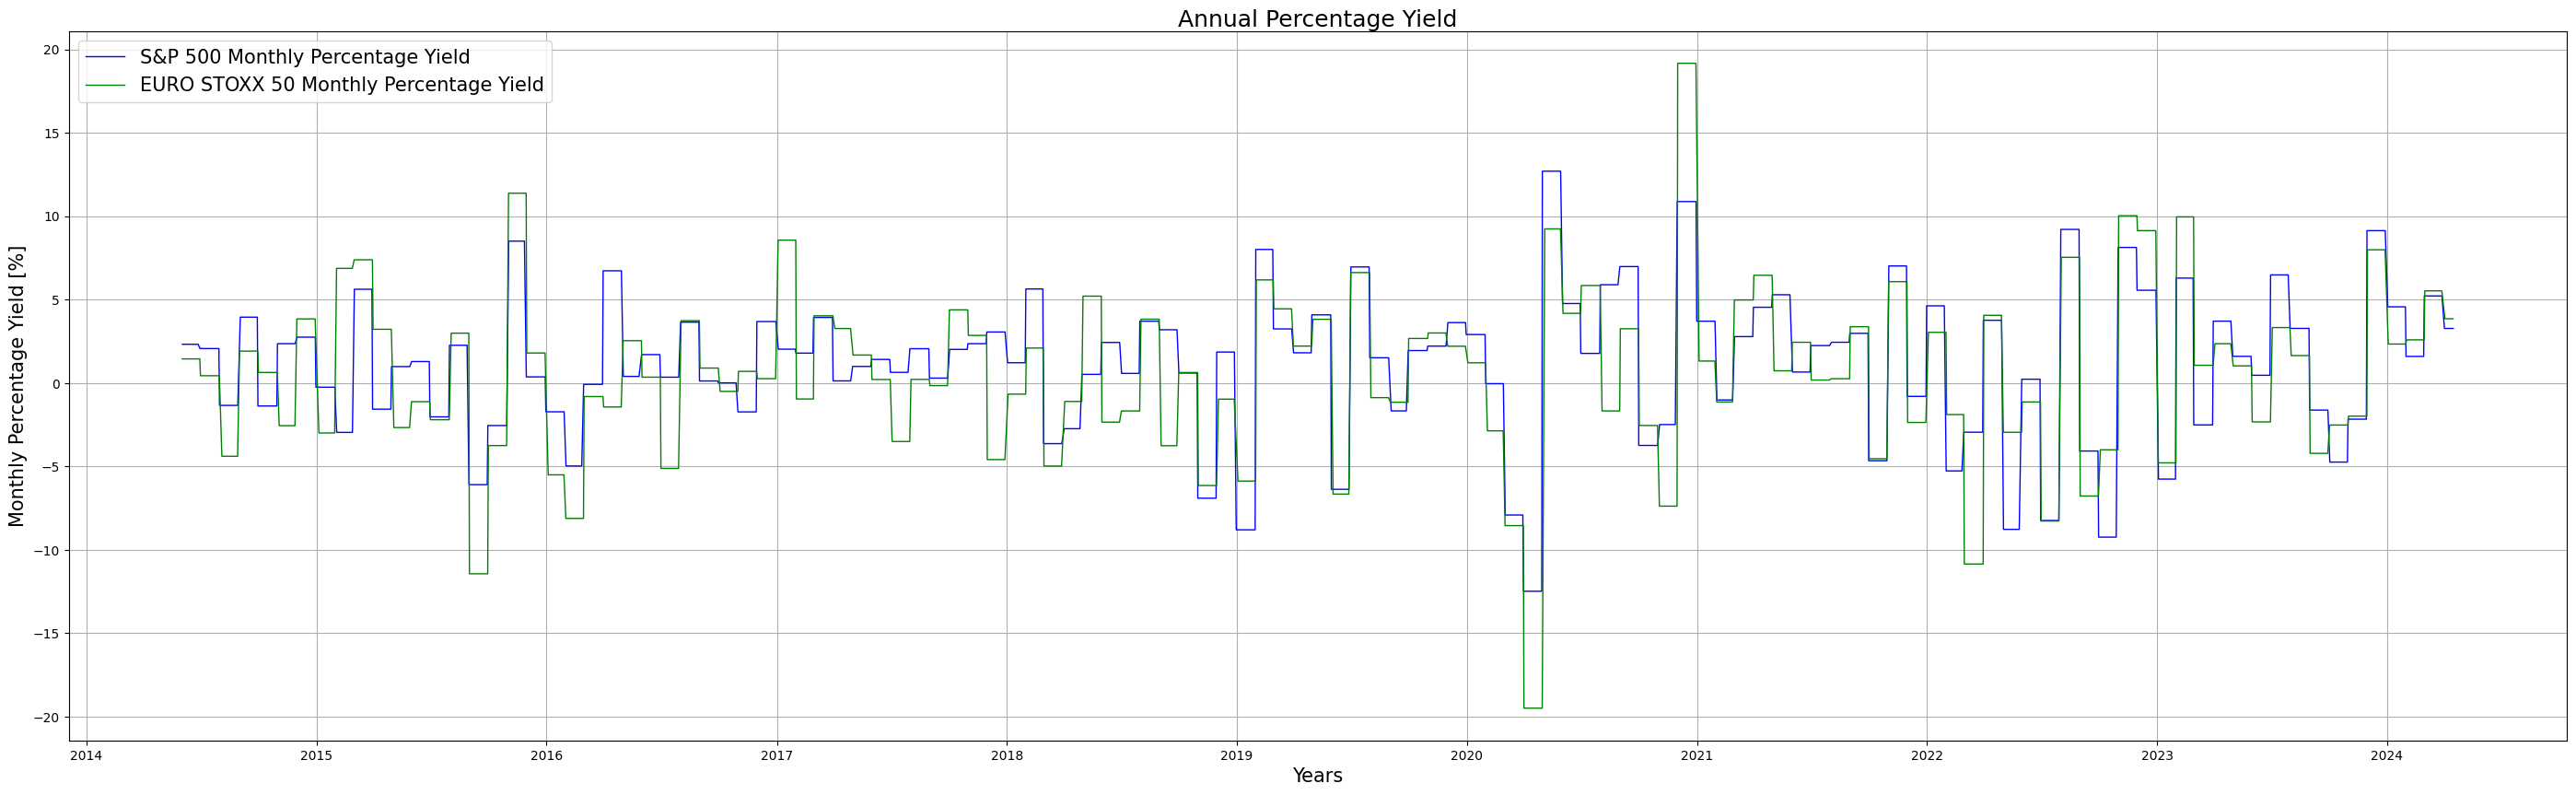

In [ ]:
if not sp500['Monthly Percentage Yield [%]'].dropna().empty and not euro50['Monthly Percentage Yield [%]'].dropna().empty:
    fig, ax = plt.subplots(1, 1, figsize=(35, 10))

    ax.plot(sp500["Date"], sp500["Monthly Percentage Yield [%]"], label="S&P 500 Monthly Percentage Yield", color="blue", linestyle="-", linewidth=1)
    ax.plot(euro50["Date"], euro50["Monthly Percentage Yield [%]"], label="EURO STOXX 50 Monthly Percentage Yield", color="green", linestyle="-", linewidth=1)
    ax.set_title("Annual Percentage Yield", fontsize = 18, pad = 0.7)
    ax.set_xlabel("Years", fontsize = 15)
    ax.set_ylabel("Monthly Percentage Yield [%]", fontsize = 15)
    ax.legend(loc = "upper left", fontsize = 15)
    ax.grid(True)

    plt.show()

else:
    print("Data for S&P 500 and/or EURO STOXX 50 is not available.")